# Insurance Claims

In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data.

In [8]:
claims_data = pd.read_csv("C:/Users/user/Downloads/Case Study 3 - Insurance Claims Case Study/claims.csv")
claims_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [9]:
cust_data = pd.read_csv("C:/Users/user/Downloads/Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")
cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [10]:
data = pd.merge(left =  cust_data,
              right = claims_data,
              left_on = "CUST_ID",
              right_on = "customer_id",
              how = "inner",
              indicator = True
             )
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,both
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,both
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,both
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,both
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,both
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,both
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,both
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,both


In [11]:
data=data.drop(columns = '_merge')
data.dropna(inplace = True)

Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [12]:
#Data Audit
d=data.dtypes[data.dtypes!='object'].index.values
data[d]=data[d].astype('float64')
mean=DataFrame({'mean':data[d].mean()})
std_dev=DataFrame({'std_dev':data[d].std()})
missing= DataFrame({'missing':data[d].isnull().sum()})
minimum=DataFrame({'min':data[d].min()})
maximum=DataFrame({'max':data[d].max()})
DA=pd.concat([mean,std_dev,missing,minimum,maximum],axis=1,sort = False)

c=data.dtypes[data.dtypes=='object'].index.values
Mean=DataFrame({'mean':np.repeat('Not Applicable',len(c))},index=c)
Std_Dev=DataFrame({'std_dev':np.repeat('Not Applicable',len(c))},index=c)
Missing=DataFrame({'missing':data[c].isnull().sum()})
Minimum=DataFrame({'min':np.repeat('Not Applicable',len(c))},index=c)
Maximum=DataFrame({'max':np.repeat('Not Applicable',len(c))},index=c)
Da=pd.concat([Mean,Std_Dev,Missing,Minimum,Maximum],axis =1,sort = False)
Dq = pd.concat([DA,Da])
Dq

,mean,std_dev,missing,min,max
CUST_ID,50607688.355094,28550999.399406,0,263204.0,99961993.0
claim_id,48640566.596439,29237332.129224,0,26832.0,99775483.0
customer_id,50607688.355094,28550999.399406,0,263204.0,99961993.0
total_policy_claims,1.589515,1.14695,0,1.0,8.0
gender,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
DateOfBirth,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
State,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
Contact,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
Segment,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
incident_cause,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable


Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the sign.

In [13]:
data['claim_amount'] = data['claim_amount'].astype(str)
data['claim_amount'] = data['claim_amount'].str.replace('$','')
data['claim_amount'] = pd.to_numeric(data['claim_amount'])
data

C:\Users\user\AppData\Local\Temp\ipykernel_8828\485839852.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['claim_amount'] = data['claim_amount'].str.replace('$','')


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873.0,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No
1081,42364152.0,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No
1082,19888166.0,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No
1083,11256802.0,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No


Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [14]:
data['Flag'] = np.where(data.police_report == 'Unknown',0,1)
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873.0,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152.0,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,1
1082,19888166.0,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802.0,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,1


Q5. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [15]:
data.drop_duplicates(subset = 'CUST_ID',keep = 'last')


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
5,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,0
7,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873.0,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152.0,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,1
1082,19888166.0,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802.0,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,1


Q6. Check for missing values and impute the missing values with an appropriate value.(mean for continuous and mode for categorical)

In [16]:
#Categorical values
data['total_policy_claims'].fillna(data['total_policy_claims'].mode(), inplace=True)

#Continous values
data['claim_amount'].fillna(data['claim_amount'].mean(), inplace=True)
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873.0,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152.0,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,1
1082,19888166.0,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802.0,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,1


Q7. Calculate the age of customers in years. Based on the age, categorize the customers :

In [17]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(data['DateOfBirth']).year          #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
data['age'] = (np.where(dob_year > curr_year,v,y))
#Categorising
data.loc[(data.age < 18),'AgeGroup'] = 'Children'
data.loc[(data.age >=18) & (data.age <30),'AgeGroup'] = 'Youth'
data.loc[(data.age >=30) & (data.age <60),'AgeGroup'] = 'Adult'
data.loc[(data.age >=60),'AgeGroup'] = 'Senior'

data.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,age,AgeGroup
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,1,44,Adult
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0,53,Adult
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,1,39,Adult
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,1,39,Adult
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,1,37,Adult


Q8. What is the average amount claimed by the customers from various segments?

In [18]:
data.groupby('Segment').agg({'claim_amount':'mean'}).reset_index()


,Segment,claim_amount
0,Gold,12723.927954
1,Platinum,12397.859420
2,Silver,12217.995298


Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [19]:
from datetime import datetime, date, timedelta

# Convert 'claim_date' column to datetime format
data['claim_date'] = pd.to_datetime(data['claim_date'])

# Convert cutoff_date to a datetime object
cutoff_date = datetime(2018, 10, 1) - timedelta(days=20)

# Filter the claims that have been done at least 20 days prior to October 1, 2018
filtered_claims = data[data['claim_date'] <= cutoff_date]

# Calculate the total claim amount based on incident cause
total_claim_amount = filtered_claims.groupby('incident_cause').agg({'claim_amount':'sum'}).reset_index()

total_claim_amount

,incident_cause,claim_amount
0,Crime,662110.0
1,Driver error,3168250.0
2,Natural causes,1183331.5
3,Other causes,3486969.0
4,Other driver error,3053360.0


Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [20]:
count = data[((data.State == 'TX') | (data.State == 'DE') | (data.State == 'AK')) & (data.incident_cause == 'Driver error') & (data.AgeGroup == 'Adult')]['CUST_ID'].count()
count

14

Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment.

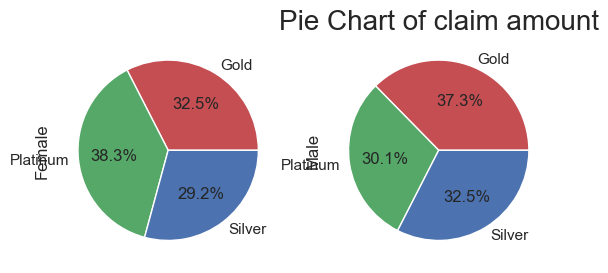

In [32]:
claim = data.pivot_table(index ='Segment',columns ='gender',values ='claim_amount', aggfunc = 'sum')

claim.plot(kind='pie', 
            colors=['r', 'g', 'b'], legend = False,
            autopct='%.1f%%', # to get percentage and round off appropriately
            subplots= True)

plt.title('Pie Chart of claim amount',fontsize=20)


plt.show()


Q12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [22]:
issue = data[data['incident_cause'].isin(['Driver error','Other driver error'])] #for multiple or use isin function
group_gender = issue.groupby('gender').agg({'claim_amount':'sum'}).reset_index()
group_gender.nlargest(1,'claim_amount')

,gender,claim_amount
1,Male,3762289.0


<Axes: >

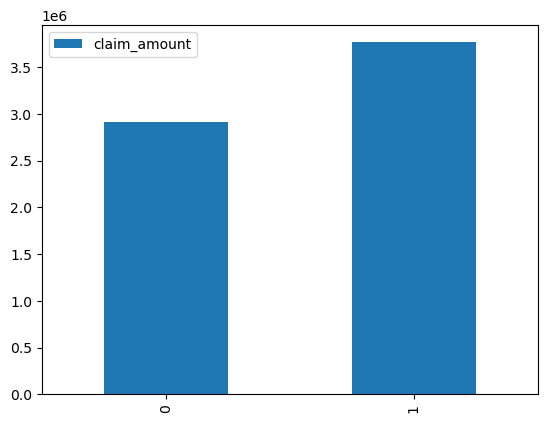

In [23]:
# Comparing using a bar chart
group_gender.plot(kind = 'bar')

Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

<Axes: xlabel='AgeGroup'>

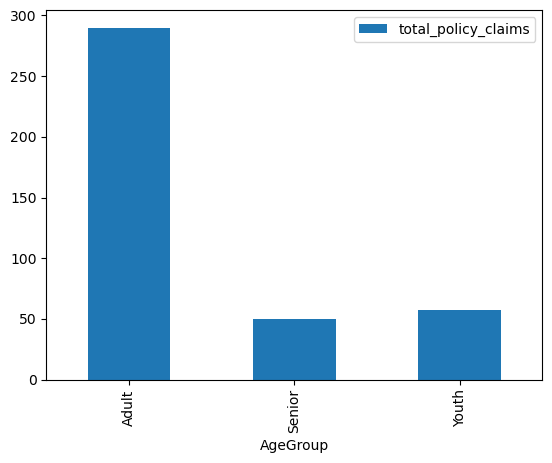

In [24]:
issue1 = data[data['fraudulent'] == 'Yes']
group_age = issue1.groupby('AgeGroup').agg({'total_policy_claims':'sum'})
group_age.plot(kind = 'bar')

Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

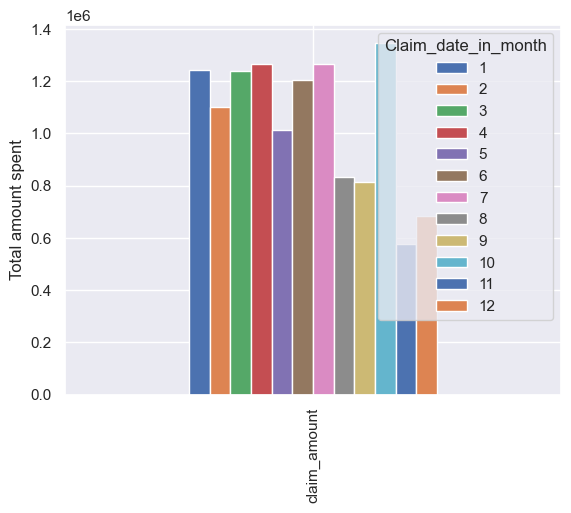

In [45]:
# Convert 'claim_date' column to datetime format
data['claim_date'] = pd.to_datetime(data['claim_date'])
data['Claim_date_in_month'] = data['claim_date'].dt.month

# Set the plot style and color palette
sns.set()
#sns.set_palette("dark")

# Create a pivot table and plot the bar chart
pivot_table = data.pivot_table( columns='Claim_date_in_month', values='claim_amount', aggfunc = 'sum')
pivot_table.plot(kind='bar')
# Customize the plot labels
plt.ylabel('Total amount spent')

# Display the plot
plt.show()


Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [ ]:
# Group the data by gender, age categories, and fraudulent claims
avg_amt_gen_age = data.groupby(['gender', 'age', 'fraudulent']).agg({'claim_amount':'mean'}).reset_index()

# Create a facetted bar chart
sns.catplot(x='age', y='claim_amount', hue='gender', col='fraudulent', data=avg_amt_gen_age, kind='bar', height=5, aspect=1.5)

# Set the axis labels and title
plt.xlabel('Age Categories')
plt.ylabel('Average Claim Amount')
plt.suptitle('Average Claim Amount for Gender and Age Categories', y=1.02)

# Show the plot
plt.show()

16. Is there any similarity in the amount claimed by males and females?

In [ ]:
claim_male = data['claim_amount'].loc[data['gender']=="Male"]

claim_female = data['claim_amount'].loc[data['gender']=="Female"]

In [ ]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

Two Sample t-Test(Independent)

In [ ]:
import scipy.stats as stats

eq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)    # equal variance
eq_var.statistic

In [ ]:
uneq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)    # UnEqual variance
uneq_var.statistic

In [ ]:
# We'll cosider equal variance since the t score is not having a huge difference
uneq_var.statistic - eq_var.statistic

In [ ]:
t = eq_var.statistic

p = eq_var.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

17. Is there any relationship between age category and segment?

Chi-Square Test

In [ ]:
agecat_seg_xtab = pd.crosstab(data.AgeGroup, data.Segment, margins = True)
agecat_seg_xtab

In [ ]:
x2test_17 = stats.chi2_contingency(observed= agecat_seg_xtab)

x2test_17

In [ ]:
print("The chi square stat is {} and the p value is {}".format(x2test_17[0],x2test_17[1]))


Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment


19. Is there any difference between age groups and insurance claims?

F-Test/Anova

In [ ]:
age_group_1 = data['total_policy_claims'].loc[data['AgeGroup']=="Youth"]
age_group_2 = data['total_policy_claims'].loc[data['AgeGroup']=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims


20. Is there any relationship between total number of policy claims and the claimed amount?

Correlation

In [ ]:
data.total_policy_claims.corr(other=data.claim_amount)


Hence total number of policy claims is inversely proportional to the claimed amount


In [ ]:
sns.lmplot(x = "total_policy_claims", y = "claim_amount",data = data)
